In [162]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Bank customers who are more likely to leave the bank

In [72]:
data = pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [73]:
# show number of columns and rows
data.shape

(7043, 21)

In [74]:
# show columns names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [165]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols
print(data.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [166]:
#checking the missing data
data.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [79]:
# show some statistics
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [80]:
# how many people churn or not churn

In [81]:
# get customer churn counts
data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

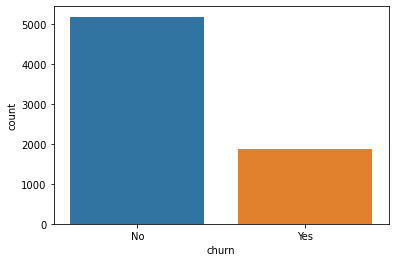

In [82]:
# visualize the counts of churn
sns.countplot(data['churn'])

In [83]:
#perecentage of customers leaving
num_retained = data[data.churn == 'No'].shape[0]
num_churned = data[data.churn == 'Yes'].shape[0]

In [84]:
# percentage of customers stayed
(num_retained/(num_retained+num_churned)*100, '% of customers stayed with the company.')

(73.4630129206304, '% of customers stayed with the company.')

In [85]:
#percentage of customers left
(num_churned/(num_churned+num_retained)*100, '% of customers left the company.')

(26.536987079369588, '% of customers left the company.')

<AxesSubplot:xlabel='gender', ylabel='count'>

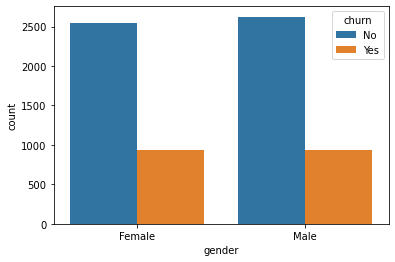

In [86]:
# visualize churn count for male and female 
sns.countplot(x = 'gender' ,hue='churn' , data = data)

<AxesSubplot:xlabel='internetservice', ylabel='count'>

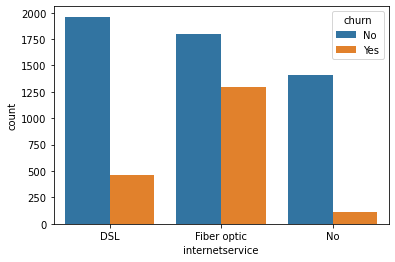

In [87]:
# visualize churn count for internet service
sns.countplot(x = 'internetservice' ,hue='churn' , data = data)

The highest number who did not churn uses DSL internet service , and the highest number who did churn have fiber optic internet service

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'monthlycharges'}>], dtype=object)

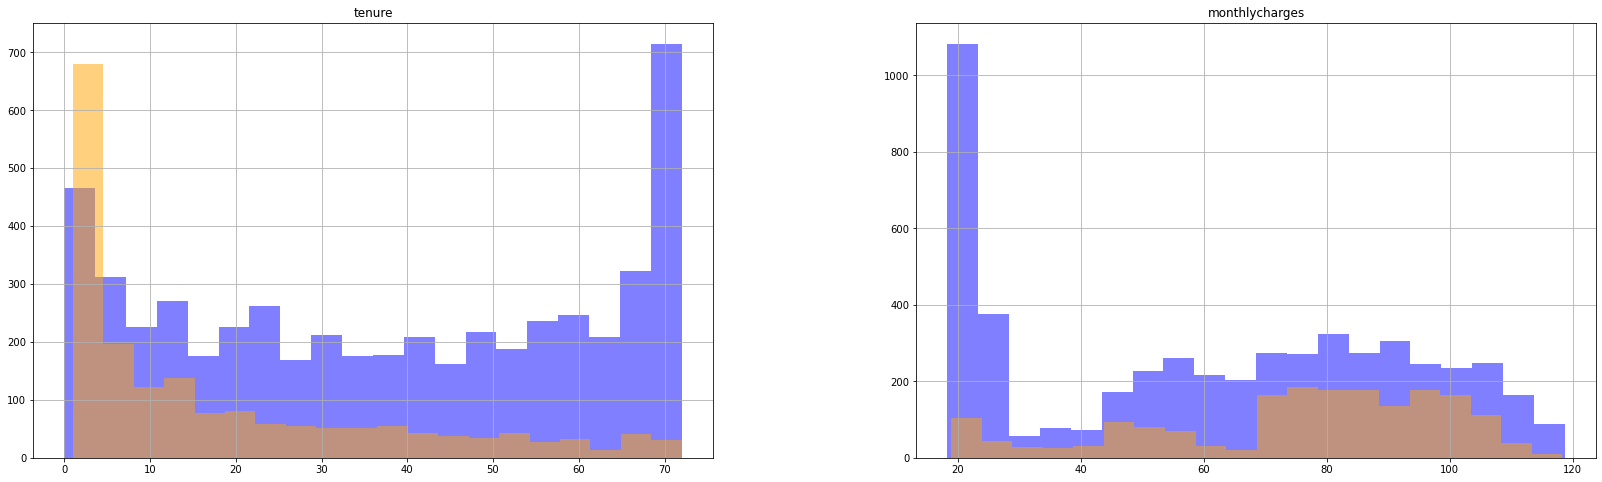

In [88]:
numerical_features=['tenure','monthlycharges']
fix, ax = plt.subplots(1, 2, figsize=(28,8))
data[data.churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax = ax)
data[data.churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax = ax)

Most the customers that are staying they have monthly charges around 20 to 30 dollars while on tenure customers that churn the higher tenure the one left have lower tenure and the ones stayed have higher tenure.

# Data Pre Processing

In [89]:
# drop unnecessary column
clean_data = data.drop ('customerid' , axis = 1)

In [ ]:
cleaned_df = clean_data.drop ('monthlycharges' , axis = 1)

In [170]:
cleaned_df1 = clean_data.drop ('totalcharges' , axis = 1)

In [171]:
# check for the numbers of rows and columns 
cleaned_df1.shape

(7043, 19)

In [172]:
le=LabelEncoder()  
for column in cleaned_df1.columns:  
    if cleaned_df1[column].dtype == np.number: 
        continue  
        cleaned_df1[column] = le.fit_transform(cleaned_df1[column]) 

In [173]:
cleaned_df1

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,Yes


In [175]:
# scale the data
X = cleaned_df1.drop('churn', axis=1) #feature data set
y = cleaned_df1['churn']

#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [183]:
classification = LogisticRegression(random_state=0, solver ='lbfgs', max_iter = 400, multi_class = 'ovr').fit(X_train, y_train)

In [185]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.7989778534923339

In [189]:
# This tells us 79% of the dependent vaible (churn) can be explained by our independent variables which are not dropped.